### Feature_Engineer (Feature Transformation, Scaling, and Selection)
#### Project name: Telecom Customer Churn Prediction
#### Author: Fausto Pucheta Fortin

### **Overview** 
In our previous analysis, we explored interactions between categorical and continuous features and the target variable *left* using different hypothesis testing approaches in order to assess the intrinsic relationship between them. These insights provide a foundation for constructing, transforming, and selecting features critical for modeling. This notebook will formalize feature engineering as the final preparatory step before the first iteration of the modeling phase.

#### **Steps to be Performed**
1. **Satisfaction vs Left**: \
Based on the distinct satisfaction bands identified in KDE plots (0.0–0.25, 0.275–0.575, 0.625–1.00), engineer a categorical feature to label employees' satisfaction levels into these ranges. This segmentation aims to simplify complex patterns for predictive modeling. 

2. **Last Evaluation vs Left**: \
Based on the two peaks in the previous KDE plot around 0.36–0.65 and 0.75–1.1, a categorical feature with three nominal labels will be created: *low_score*, *medium_score*, and *high_score*. This classification encapsulates key insights from the evaluation scores' distribution.

3. **Average Monthly Hours vs Left**: \
Average monthly hours will be categorized into workload levels to better capture patterns of employee engagement and churn risks: \
Employees with 100–195 average monthly hours (**lower workload**). \
Employees with 195–345 average monthly hours (**higher workload**)

4. **Interaction Features Analysis**
A brief but targeted analysis will be conducted to identify meaningful interactions between features before finalizing the engineered dataset. This step will guide additional feature engineering decisions, enhancing the dataset's predictive power.

5. **Correlation Analysis For Multicolinearity Detection**

6. **Removing Irrelevant Features**


#### **Findings**


#### **Further Steps**

In [1]:
# IMPORT LIBRARIES

# Operational
import pandas as pd
import numpy as np

# Visualizations
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from src.utils.plot_functions import save_fig
%matplotlib inline 
from src.utils.plot_functions import save_fig

df = pd.read_csv("./../data/processed/df_subset_2.csv")

##### 1. **Satisfaction vs Left**

In [2]:
# Bin edges and corresponding labels
bins = [0.0, 0.25, 0.575, 1.0]  # Note: edges are inclusive of lower bounds
labels = ['Low Score', 'Medium Score', 'High Score']

# Use pd.cut for efficient binning
df['satisfaction_level_band'] = pd.cut(
    df['satisfaction_level'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True, 
    right=True  # Indicates if the right edge is inclusive
)

# Display results
satisfaction_level_band_ct = pd.crosstab(df['satisfaction_level_band'], df['left'])
satisfaction_level_band_ct

left,0,1
satisfaction_level_band,,
Low Score,839,934
Medium Score,2710,1652
High Score,7879,985


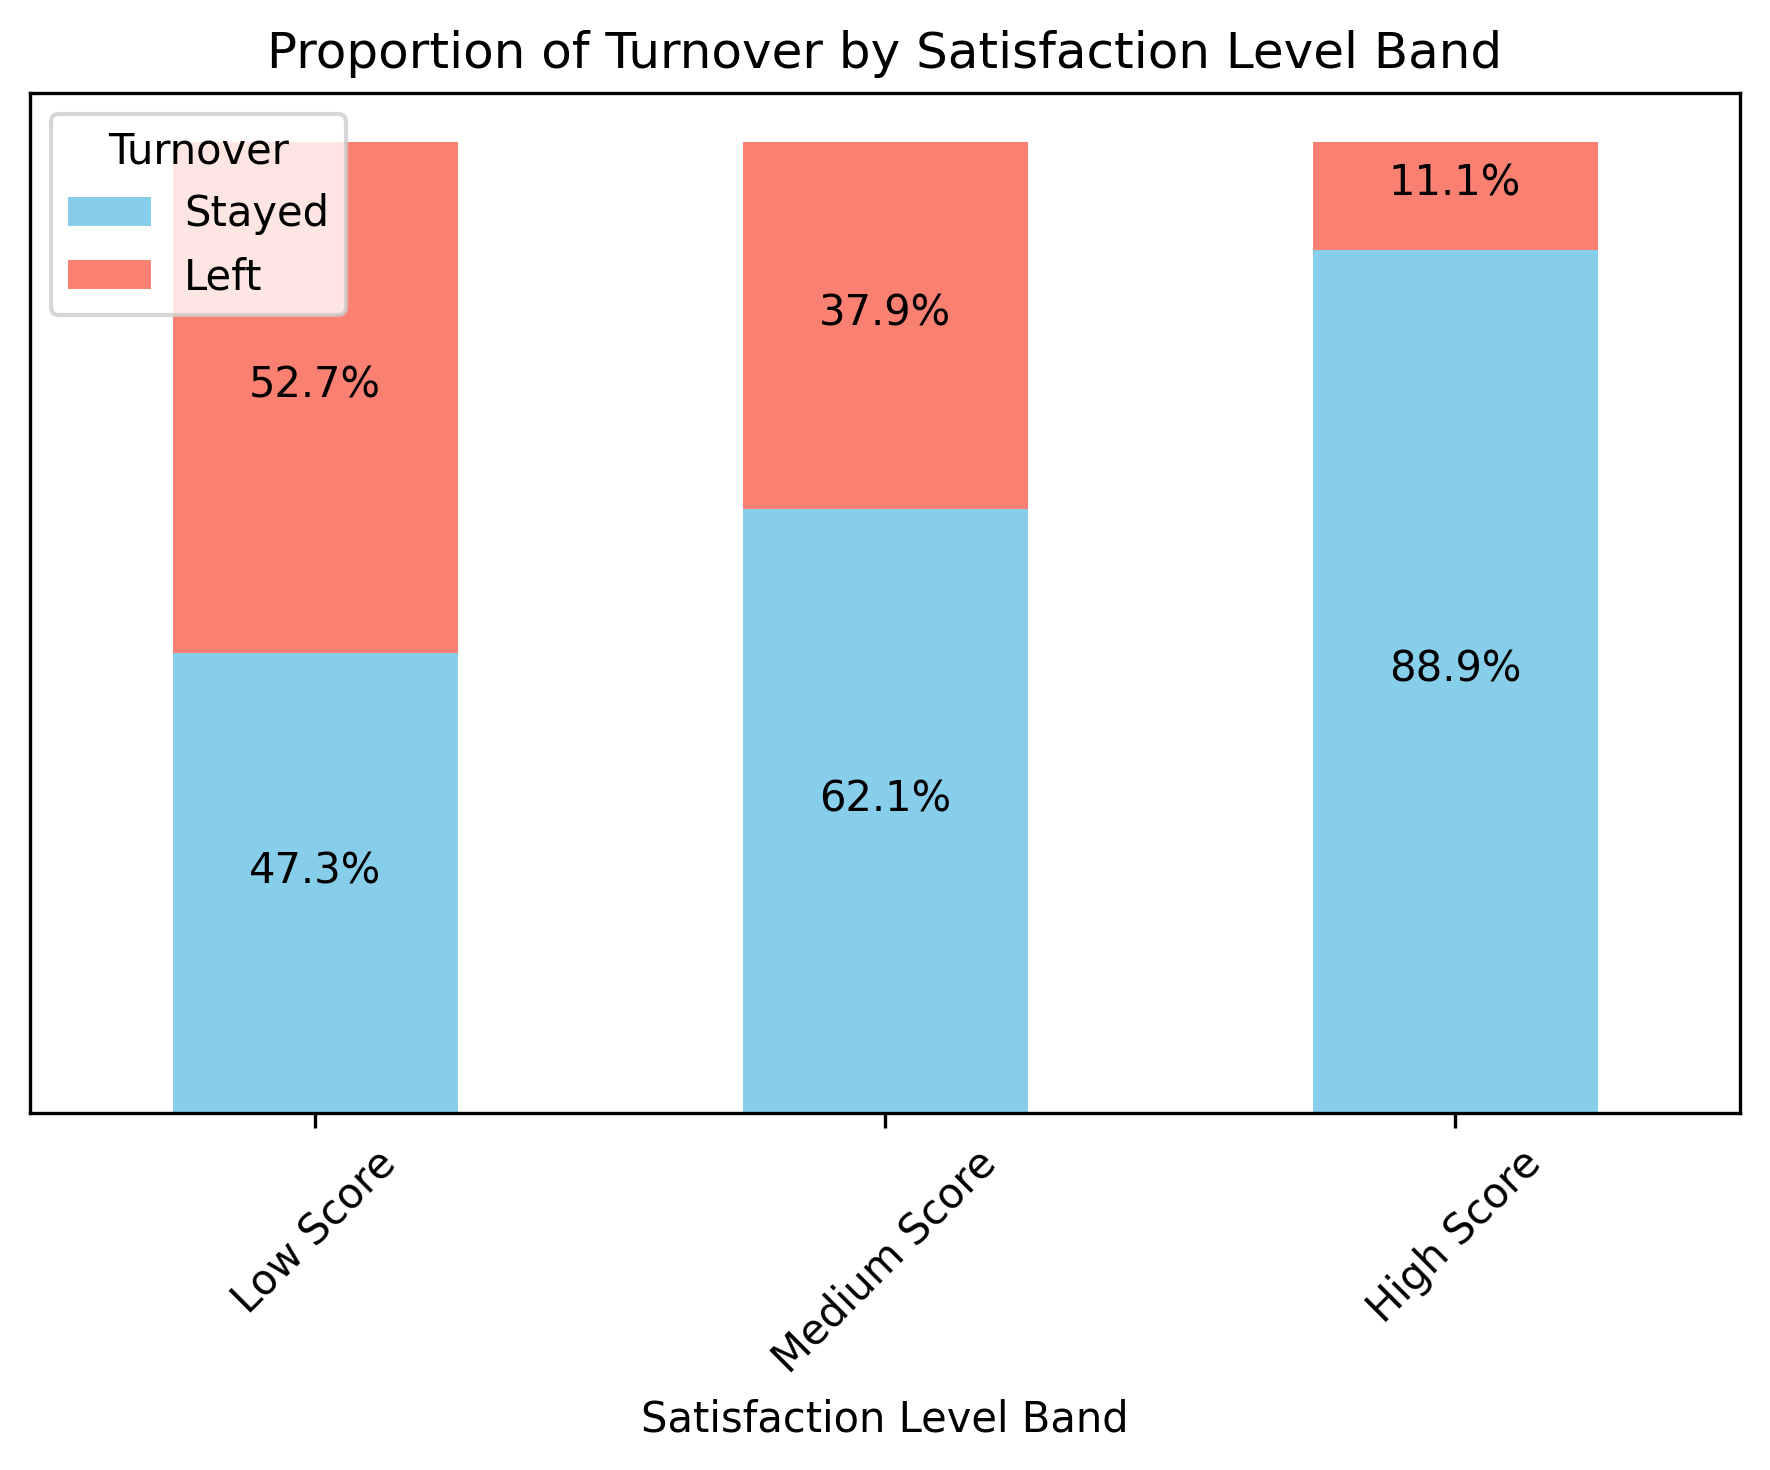

Saved at ./../reports/figures/03-Feature_Engineer/satisfaction_level_band_vs_left.png


In [3]:
# Normalize the contingency table to show proportions
satisfaction_level_band_ct_normalized = satisfaction_level_band_ct.div(satisfaction_level_band_ct.sum(axis=1), axis=0)

# Plot the proportions
ax = satisfaction_level_band_ct_normalized.plot(
    kind='bar', stacked=True, figsize=(6, 5), color=['skyblue', 'salmon']
)
plt.title('Proportion of Turnover by Satisfaction Level Band')
plt.yticks([])
plt.ylabel(None)
plt.xlabel('Satisfaction Level Band')
plt.legend(['Stayed', 'Left'], title='Turnover')
plt.xticks(rotation=45)

# Annotate the percentages
for idx, row in enumerate(satisfaction_level_band_ct_normalized.itertuples(index=False)):
    stayed_pct = row[0] * 100  # Proportion of Stayed
    left_pct = row[1] * 100    # Proportion of Left

    # Position annotations on each bar
    plt.text(idx, row[0] / 2, f"{stayed_pct:.1f}%", ha='center', color='black', fontsize=10)
    plt.text(idx, row[0] + (row[1] / 2), f"{left_pct:.1f}%", ha='center', color='black', fontsize=10)

plt.tight_layout()
#plt.show()

# Save Figure
figure = plt.gcf()
save_fig(figure, "./../reports/figures/03-Feature_Engineer/","satisfaction_level_band_vs_left", "png")

##### 2. **Last Evaluation vs Left**

In [4]:
# Bin edges and corresponding labels
bins = [0.36, 0.65, 0.75, 1.1]  # Note: edges are inclusive of lower bounds
labels = ['Low Score', 'Medium Score', 'High Score']

# Use pd.cut for efficient binning
df['evaluation_score_band'] = pd.cut(
    df['last_evaluation'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True, 
    right=True  # Indicates if the right edge is inclusive
)

# Display results
evaluation_score_ct = pd.crosstab(df['evaluation_score_band'], df['left'])
evaluation_score_ct

left,0,1
evaluation_score_band,,
Low Score,4458,1644
Medium Score,2165,58
High Score,4805,1869


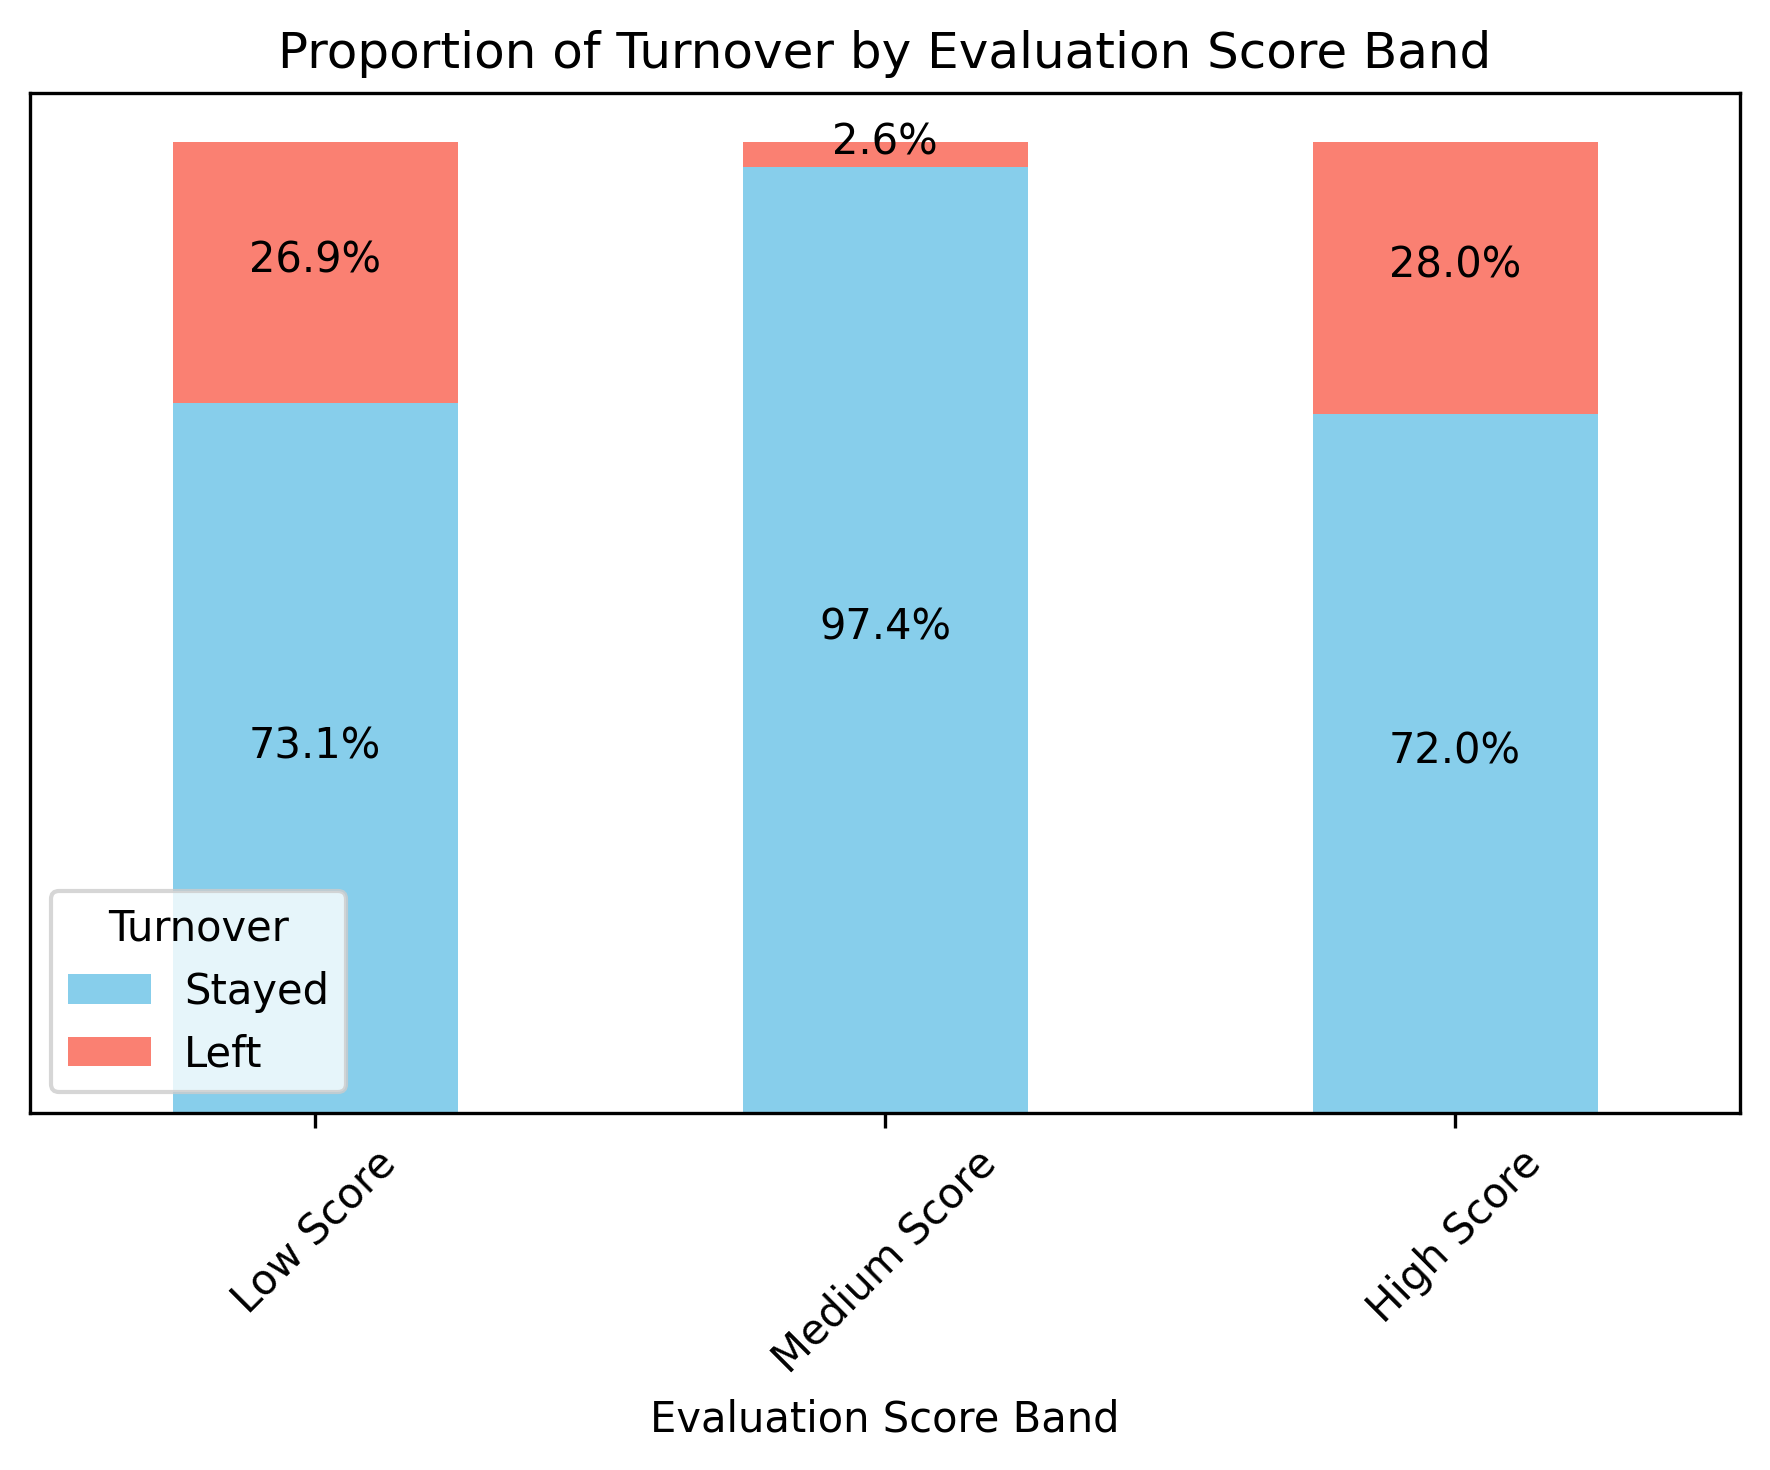

Saved at ./../reports/figures/03-Feature_Engineer/ev_score_band_vs_left.png


In [5]:
# Normalize the contingency table to show proportions
evaluation_score_ct_normalized = evaluation_score_ct.div(evaluation_score_ct.sum(axis=1), axis=0)

# Plot the proportions
ax = evaluation_score_ct_normalized.plot(
    kind='bar', stacked=True, figsize=(6, 5), color=['skyblue', 'salmon']
)
plt.title('Proportion of Turnover by Evaluation Score Band')
plt.yticks([])
plt.ylabel(None)
plt.xlabel('Evaluation Score Band')
plt.legend(['Stayed', 'Left'], title='Turnover')
plt.xticks(rotation=45)

# Annotate the percentages
for idx, row in enumerate(evaluation_score_ct_normalized.itertuples(index=False)):
    stayed_pct = row[0] * 100  # Proportion of Stayed
    left_pct = row[1] * 100    # Proportion of Left

    # Position annotations on each bar
    plt.text(idx, row[0] / 2, f"{stayed_pct:.1f}%", ha='center', color='black', fontsize=10)
    plt.text(idx, row[0] + (row[1] / 2), f"{left_pct:.1f}%", ha='center', color='black', fontsize=10)

plt.tight_layout()
#plt.show()

# Save Figure
figure = plt.gcf()
save_fig(figure, "./../reports/figures/03-Feature_Engineer/","ev_score_band_vs_left", "png")

##### 3. **Average Monthly Hours vs Left**: 

In [6]:
# Bin edges and corresponding labels
bins = [0, 175, 200, 345]  
labels = ['Low Workload', 'Ideal Workload', 'High Workload']

# Use pd.cut for efficient binning
df['workload_band'] = pd.cut(
    df['average_montly_hours'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True, 
    right=True  # Indicates if the right edge is inclusive
)

# Display results
workload_band_ct = pd.crosstab(df['workload_band'], df['left'])
workload_band_ct


left,0,1
workload_band,,
Low Workload,3962,1614
Ideal Workload,1906,42
High Workload,5560,1915


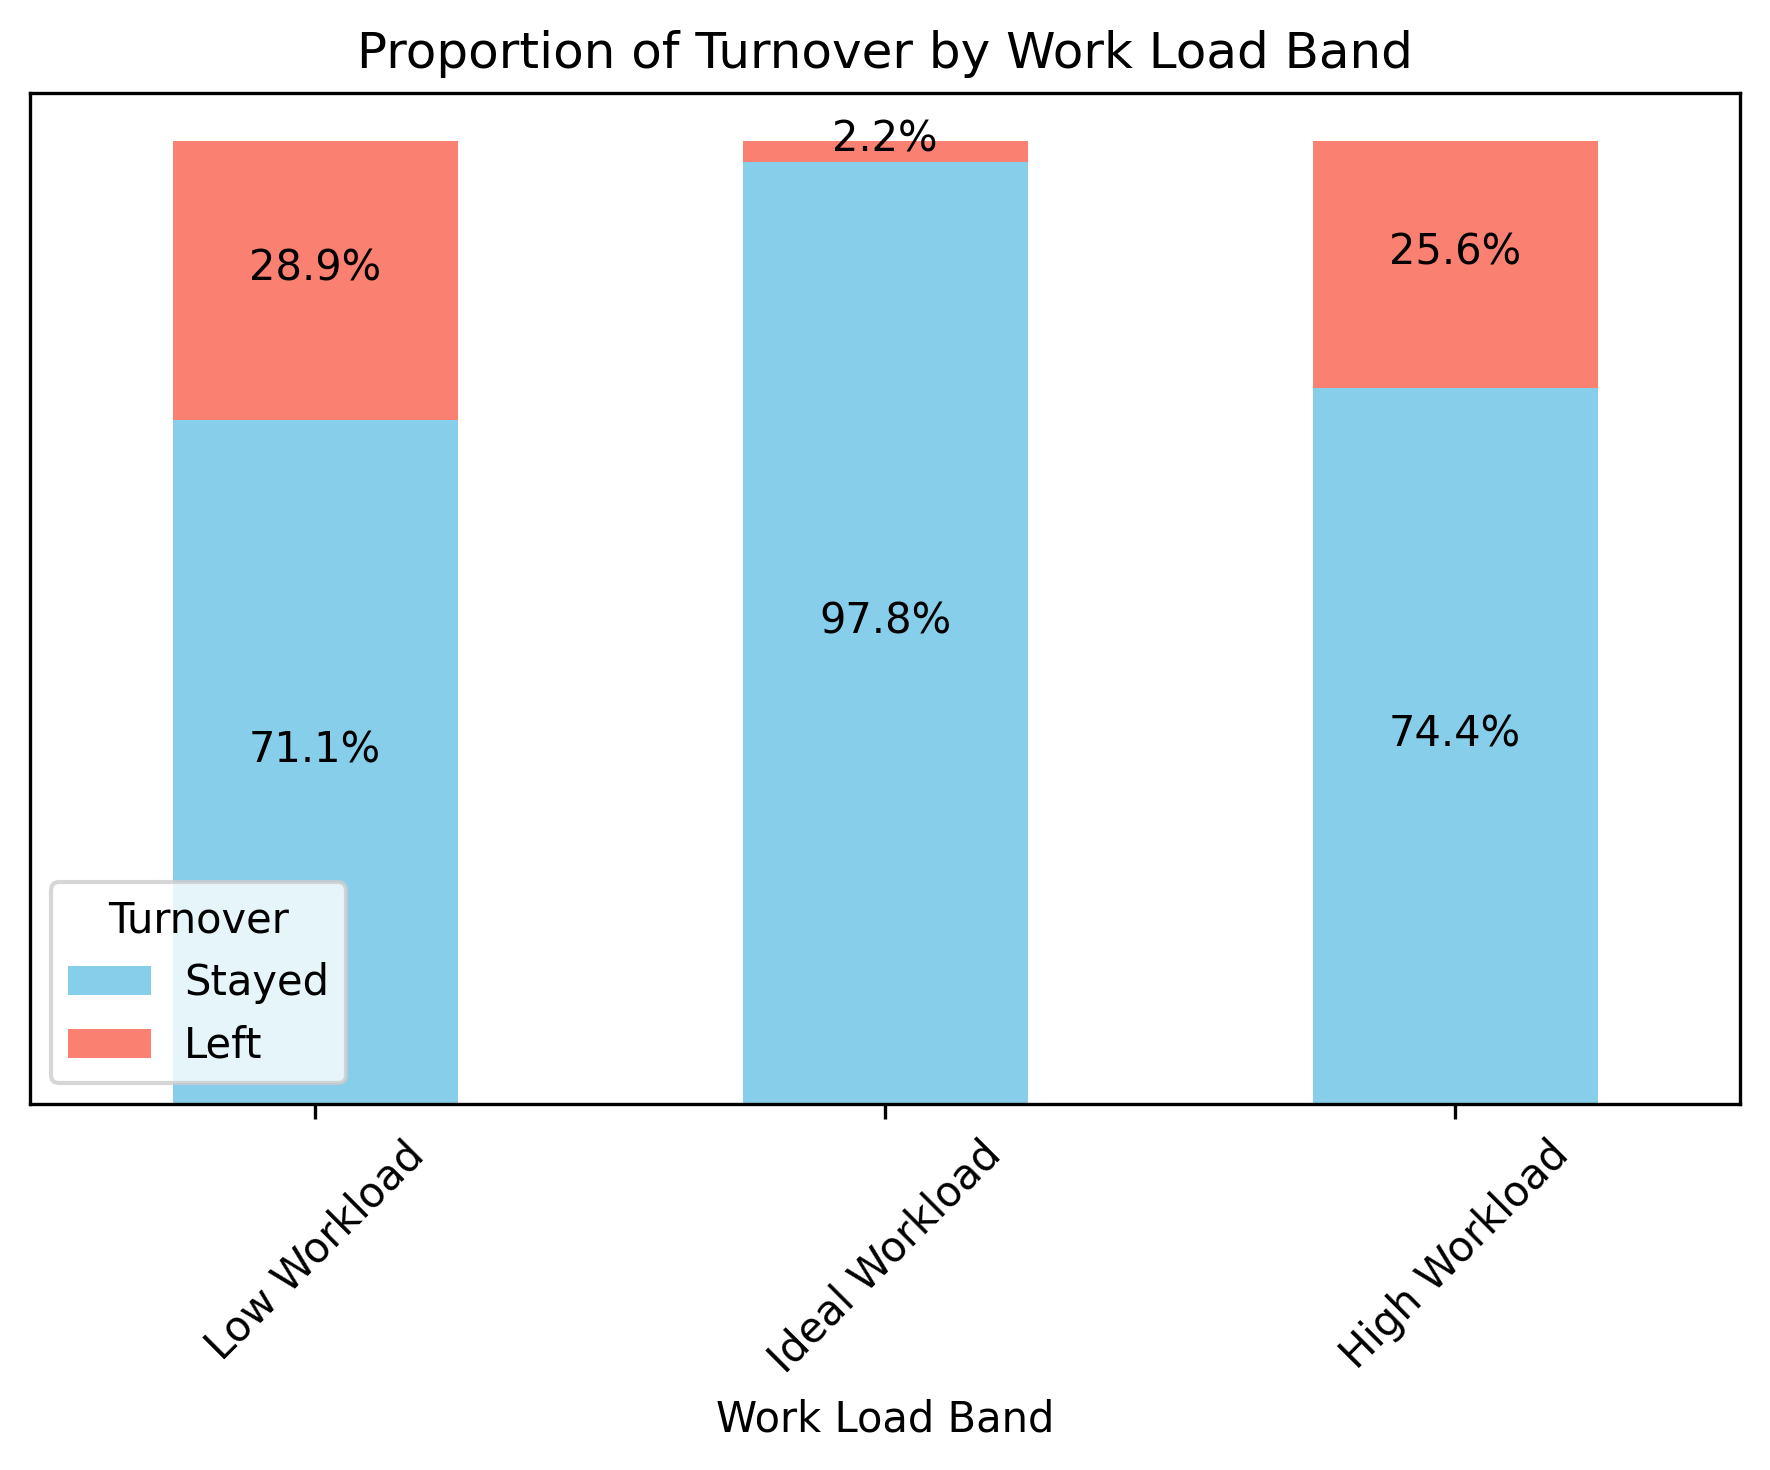

Saved at ./../reports/figures/03-Feature_Engineer/work_load_band_vs_left.png


In [7]:
# Normalize the contingency table to show proportions
workload_band_ct_normalized = workload_band_ct.div(workload_band_ct.sum(axis=1), axis=0)

# Plot the proportions
ax = workload_band_ct_normalized.plot(
    kind='bar', stacked=True, figsize=(6, 5), color=['skyblue', 'salmon']
)
plt.title('Proportion of Turnover by Work Load Band')
plt.yticks([])
plt.ylabel(None)
plt.xlabel('Work Load Band')
plt.legend(['Stayed', 'Left'], title='Turnover')
plt.xticks(rotation=45)

# Annotate the percentages
for idx, row in enumerate(workload_band_ct_normalized.itertuples(index=False)):
    stayed_pct = row[0] * 100  # Proportion of Stayed
    left_pct = row[1] * 100    # Proportion of Left

    # Position annotations on each bar
    plt.text(idx, row[0] / 2, f"{stayed_pct:.1f}%", ha='center', color='black', fontsize=10)
    plt.text(idx, row[0] + (row[1] / 2), f"{left_pct:.1f}%", ha='center', color='black', fontsize=10)

plt.tight_layout()
#plt.show()

# Save Figure
figure = plt.gcf()
save_fig(figure, "./../reports/figures/03-Feature_Engineer/","work_load_band_vs_left", "png")

##### 4. **Interaction Features Analysis**

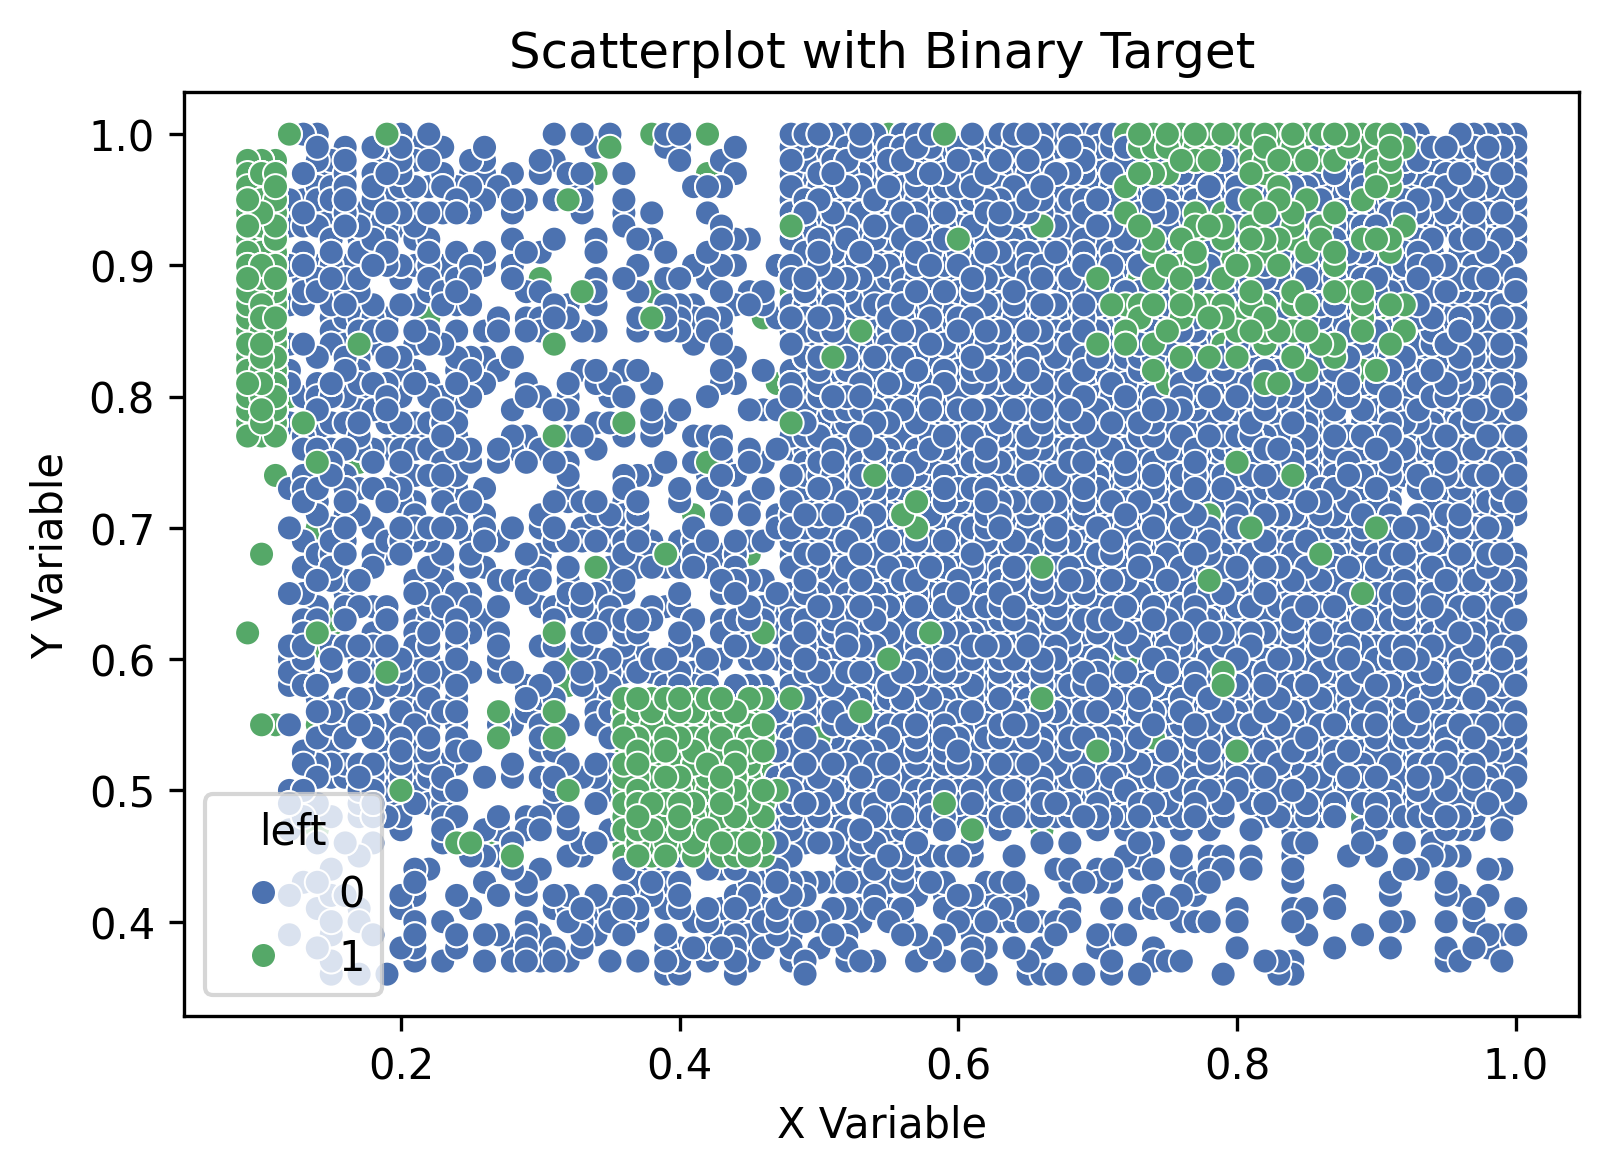

In [15]:
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=df)
plt.title('Scatterplot with Binary Target')
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.show()

##### 5. **Correlation Analysis For Multicolinearity Detection**

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,Department,salary,satisfaction_level_log,time_spend_company_transformed,project_category,satisfaction_level_band,evaluation_score_band,workload_band
0,0.38,0.53,2,157,3,0,1,sales,low,-0.967584,3 years,Low Projects (2–3),Medium Score,Low Score,Low Workload
1,0.80,0.86,5,262,6,0,1,sales,medium,-0.223144,6+ years,Average Projects (4–5),High Score,High Score,High Workload
2,0.11,0.88,7,272,4,0,1,sales,medium,-2.207275,4 years,High Projects (6–7),Low Score,High Score,High Workload
3,0.72,0.87,5,223,5,0,1,sales,low,-0.328504,5 years,Average Projects (4–5),High Score,High Score,High Workload
4,0.37,0.52,2,159,3,0,1,sales,low,-0.994252,3 years,Low Projects (2–3),Medium Score,Low Score,Low Workload


In [8]:
corr_matrix = df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'sales'

##### 6. **Removing Irrelevant Features**

In [ ]:
# Save the dataset
